# UFCFVQ-15-M Programming for Data Science (Autumn 2023)

## Student Id: 

# Programming Task 2

### Requirement FR6 - Read CSV data from two files and merge it into a single Data Frame 

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import f_oneway
plt.style.use('ggplot')

In [2]:
# Read the CSV files into DataFrames
df1 = pd.read_csv('task2a.csv')
df2 = pd.read_csv('task2b.csv')

# Ensure that the indices match up
assert df1.shape[0] == df2.shape[0]
# Ensure that duplicate fields matchup
assert df1[['Entity', 'Year']].equals(df2[['Entity', 'Year']])

# # Concatenate the DataFrames
df = pd.concat([df1, df2], axis=1)

df3 = df.T.drop_duplicates().T

df3

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Depression (%),Drug use disorders (%),Alcohol use disorders (%)
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.82883,4.071831,1.677082,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.82974,4.079531,1.684746,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,4.088358,1.694334,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,4.09619,1.70532,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,4.099582,1.716069,0.66926
...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,0.15567,0.607993,0.117248,3.090168,3.128192,0.76628,1.515641
6464,Zimbabwe,2014,0.155993,0.60861,0.118073,3.093964,3.14029,0.768914,1.51547
6465,Zimbabwe,2015,0.156465,0.609363,0.11947,3.098687,3.15571,0.771802,1.514751
6466,Zimbabwe,2016,0.157111,0.610234,0.121456,3.104294,3.174134,0.772275,1.513269


### Requirement FR7 - Explore the dataset to identify an "interesting" pattern or trend

In [3]:
# replace with your code

# shape of merged dataframe
df3.shape

(6468, 9)

In [4]:
df3.head(20)

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Depression (%),Drug use disorders (%),Alcohol use disorders (%)
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.82883,4.071831,1.677082,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.82974,4.079531,1.684746,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,4.088358,1.694334,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,4.09619,1.70532,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,4.099582,1.716069,0.66926
5,Afghanistan,1995,0.160076,0.698695,0.09098,4.828337,4.104207,1.728112,0.668746
6,Afghanistan,1996,0.160249,0.698914,0.089709,4.828083,4.1075,1.737643,0.667727
7,Afghanistan,1997,0.160554,0.699127,0.088372,4.827726,4.110834,1.746891,0.66622
8,Afghanistan,1998,0.160931,0.699372,0.08733,4.826971,4.114438,1.756963,0.664676
9,Afghanistan,1999,0.161311,0.699674,0.086267,4.826413,4.117633,1.770791,0.663428


In [5]:
# Dataframe info
# This is showing that their are no null or missing values in the dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Entity                     6468 non-null   object
 1   Year                       6468 non-null   object
 2   Schizophrenia (%)          6468 non-null   object
 3   Bipolar disorder (%)       6468 non-null   object
 4   Eating disorders (%)       6468 non-null   object
 5   Anxiety disorders (%)      6468 non-null   object
 6   Depression (%)             6468 non-null   object
 7   Drug use disorders (%)     6468 non-null   object
 8   Alcohol use disorders (%)  6468 non-null   object
dtypes: object(9)
memory usage: 454.9+ KB


In [6]:
# Checking to see if there are any missing values
# the dataframe has no missing values
df3.isna().sum()

Entity                       0
Year                         0
Schizophrenia (%)            0
Bipolar disorder (%)         0
Eating disorders (%)         0
Anxiety disorders (%)        0
Depression (%)               0
Drug use disorders (%)       0
Alcohol use disorders (%)    0
dtype: int64

In [7]:
df3.dtypes

Entity                       object
Year                         object
Schizophrenia (%)            object
Bipolar disorder (%)         object
Eating disorders (%)         object
Anxiety disorders (%)        object
Depression (%)               object
Drug use disorders (%)       object
Alcohol use disorders (%)    object
dtype: object

In [8]:
df3.describe()
# df3[['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
#        'Eating disorders (%)', 'Anxiety disorders (%)', 'Depression (%)',
#        'Drug use disorders (%)', 'Alcohol use disorders (%)']].describe()

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Depression (%),Drug use disorders (%),Alcohol use disorders (%)
count,6468,6468,6468.00000,6468.000000,6468.000000,6468.00000,6468.000000,6468.000000,6468.000000
unique,231,28,6468.00000,6468.000000,6468.000000,6468.00000,6468.000000,6468.000000,6468.000000
top,Afghanistan,1990,0.16056,0.697779,0.101855,4.82883,4.071831,1.677082,0.672404
freq,28,231,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
# df3[['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
#        'Eating disorders (%)', 'Anxiety disorders (%)', 'Depression (%)',
#        'Drug use disorders (%)', 'Alcohol use disorders (%)']].describe()

In [9]:
df3 = df3.rename(columns={'Schizophrenia (%)': 'Schizophrenia', 'Bipolar disorder (%)': 'Bipolar_Disorder',
       'Eating disorders (%)': 'Eating_Disorders', 'Anxiety disorders (%)': 'Anxiety_Disorders', 'Depression (%)': 'Depression',
       'Drug use disorders (%)': 'Drug_Use_Disorders', 'Alcohol use disorders (%)':'Alcohol_Use_Disorders'})
df3

,Entity,Year,Schizophrenia,Bipolar_Disorder,Eating_Disorders,Anxiety_Disorders,Depression,Drug_Use_Disorders,Alcohol_Use_Disorders
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.82883,4.071831,1.677082,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.82974,4.079531,1.684746,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,4.088358,1.694334,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,4.09619,1.70532,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,4.099582,1.716069,0.66926
...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,0.15567,0.607993,0.117248,3.090168,3.128192,0.76628,1.515641
6464,Zimbabwe,2014,0.155993,0.60861,0.118073,3.093964,3.14029,0.768914,1.51547
6465,Zimbabwe,2015,0.156465,0.609363,0.11947,3.098687,3.15571,0.771802,1.514751
6466,Zimbabwe,2016,0.157111,0.610234,0.121456,3.104294,3.174134,0.772275,1.513269


In [10]:
# not duplicated rows by column
# df3.loc[~df3.duplicated(subset=['Entity'])]

# select subset of dataframe rows by entity value
df_morocco = df3[df3['Entity'] == 'Belarus'].copy()
df_morocco

,Entity,Year,Schizophrenia,Bipolar_Disorder,Eating_Disorders,Anxiety_Disorders,Depression,Drug_Use_Disorders,Alcohol_Use_Disorders
504,Belarus,1990,0.191284,0.693581,0.174512,2.927442,3.998476,0.717006,4.795118
505,Belarus,1991,0.191159,0.693487,0.17205,2.92776,4.023467,0.719836,4.889664
506,Belarus,1992,0.19101,0.693393,0.169549,2.927731,4.044808,0.721867,4.977548
507,Belarus,1993,0.190855,0.693328,0.167731,2.927573,4.065183,0.724962,5.054909
508,Belarus,1994,0.190705,0.693289,0.165887,2.927205,4.085458,0.728573,5.117567
509,Belarus,1995,0.190561,0.693234,0.164067,2.926529,4.103569,0.731394,5.161239
510,Belarus,1996,0.190335,0.693205,0.162738,2.925234,4.117817,0.736539,5.195849
511,Belarus,1997,0.189994,0.693224,0.161153,2.923284,4.138396,0.741255,5.231324
512,Belarus,1998,0.18964,0.693293,0.160119,2.92139,4.158593,0.745964,5.263432
513,Belarus,1999,0.189372,0.693396,0.159517,2.919994,4.17339,0.749366,5.288012


In [11]:
# df_afgh = df_afgh.rename(columns={'Schizophrenia (%)': 'Schizophrenia', 'Bipolar disorder (%)': 'Bipolar_Disorder',
#        'Eating disorders (%)': 'Eating_Disorders', 'Anxiety disorders (%)': 'Anxiety_Disorders', 'Depression (%)': 'Depression',
#        'Drug use disorders (%)': 'Drug_Use_Disorders', 'Alcohol use disorders (%)':'Alcohol_Use_Disorders'})
# df_afgh

In [12]:
df_morocco.isna().sum()

Entity                   0
Year                     0
Schizophrenia            0
Bipolar_Disorder         0
Eating_Disorders         0
Anxiety_Disorders        0
Depression               0
Drug_Use_Disorders       0
Alcohol_Use_Disorders    0
dtype: int64

In [ ]:
Temporal Analysis

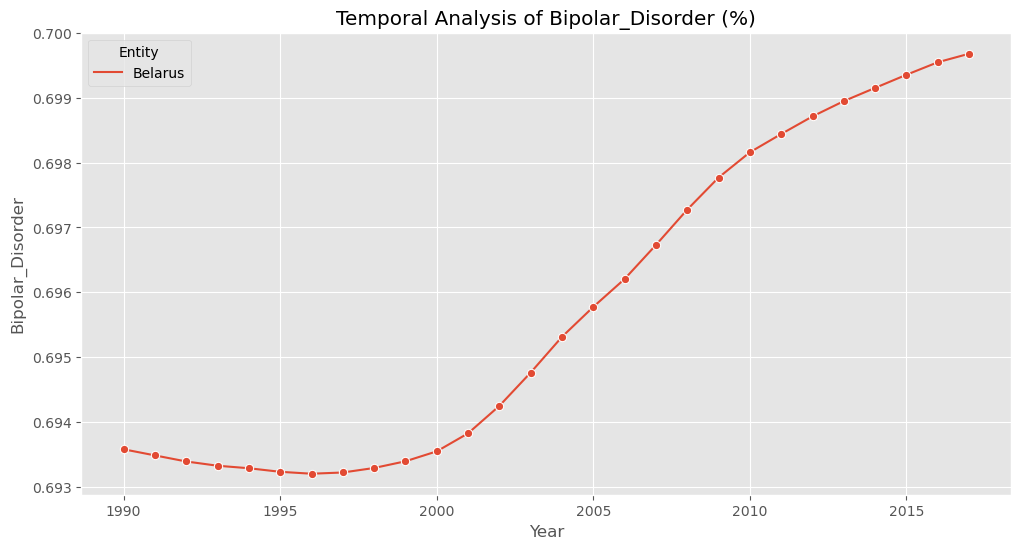

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Bipolar_Disorder', hue='Entity', data=df_morocco, marker='o')
plt.title('Temporal Analysis of Bipolar_Disorder (%)')
plt.show()

In [14]:
df_morocco.loc[df_morocco.duplicated()]

,Entity,Year,Schizophrenia,Bipolar_Disorder,Eating_Disorders,Anxiety_Disorders,Depression,Drug_Use_Disorders,Alcohol_Use_Disorders


In [15]:
df_afgh['Bipolar_Disorder'].value_counts()

NameError: name 'df_afgh' is not defined

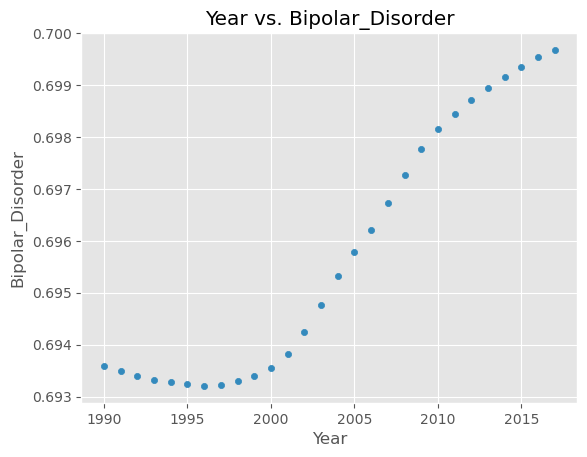

In [16]:
df_morocco.plot(kind='scatter',
             x='Year',
             y='Bipolar_Disorder',
             title='Year vs. Bipolar_Disorder')
plt.show()

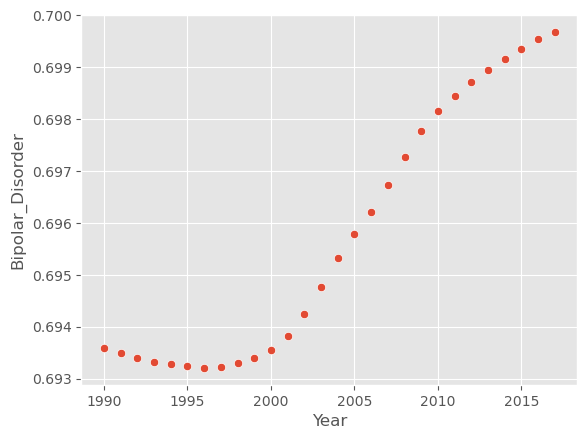

In [17]:
sns.scatterplot(x='Year',
                y='Bipolar_Disorder',
                data=df_morocco)
plt.show()

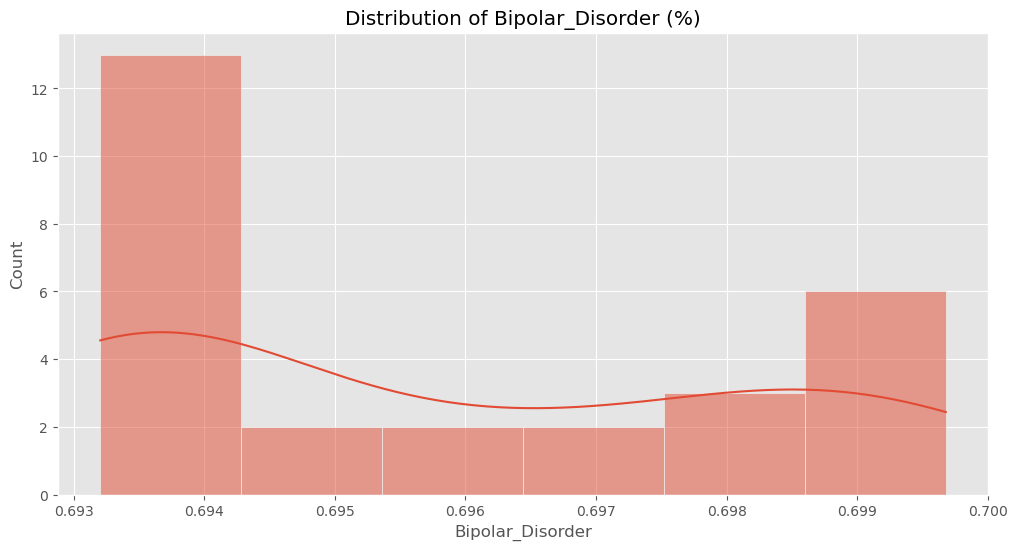

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df_morocco['Bipolar_Disorder'], kde=True)
plt.title('Distribution of Bipolar_Disorder (%)')
plt.show()

C:\Users\ajibi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


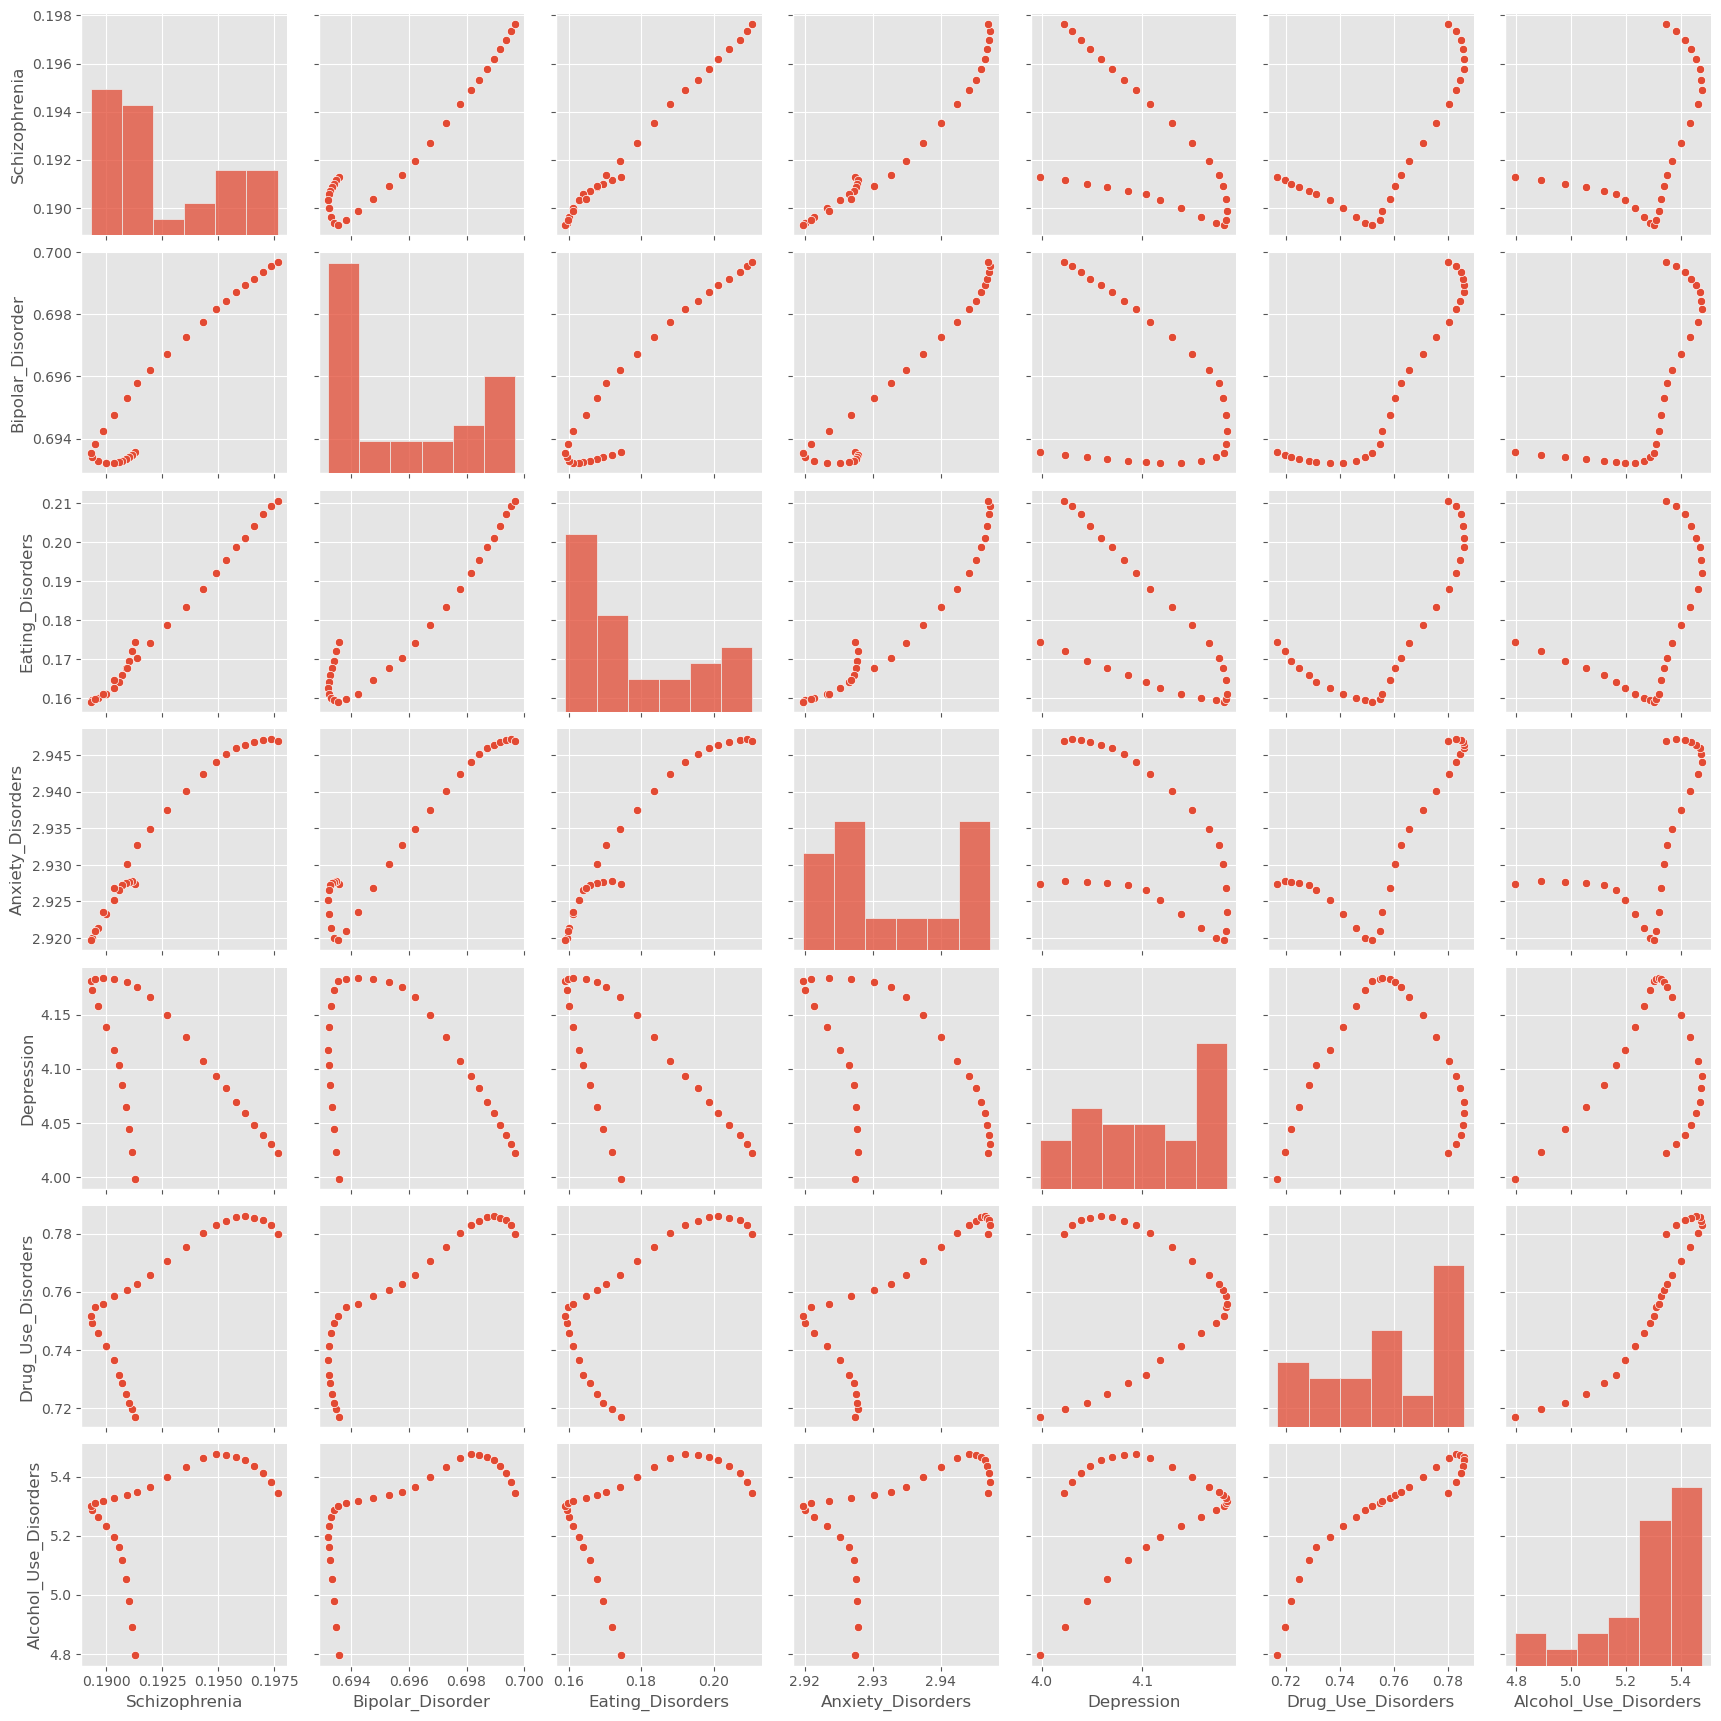

In [19]:
sns.pairplot(df_morocco, vars=['Schizophrenia','Bipolar_Disorder',
                            'Eating_Disorders','Anxiety_Disorders',
                            'Depression','Drug_Use_Disorders', 'Alcohol_Use_Disorders'])
plt.show()

In [ ]:
Correlation Analysis

In [20]:
df_morocco = df_morocco[['Schizophrenia', 'Bipolar_Disorder','Eating_Disorders', 'Anxiety_Disorders', 'Depression','Drug_Use_Disorders', 'Alcohol_Use_Disorders']].astype('float64')
df_morocco_corr = df_morocco.corr()
df_morocco_corr

,Schizophrenia,Bipolar_Disorder,Eating_Disorders,Anxiety_Disorders,Depression,Drug_Use_Disorders,Alcohol_Use_Disorders
Schizophrenia,1.000000,0.957309,0.997473,0.975518,-0.618406,0.767140,0.524417
Bipolar_Disorder,0.957309,1.000000,0.948716,0.966272,-0.378098,0.909899,0.714864
Eating_Disorders,0.997473,0.948716,1.000000,0.965466,-0.646147,0.746265,0.486437
Anxiety_Disorders,0.975518,0.966272,0.965466,1.000000,-0.531459,0.800832,0.583779
Depression,-0.618406,-0.378098,-0.646147,-0.531459,1.000000,0.014970,0.320376
Drug_Use_Disorders,0.767140,0.909899,0.746265,0.800832,0.014970,1.000000,0.930336
Alcohol_Use_Disorders,0.524417,0.714864,0.486437,0.583779,0.320376,0.930336,1.000000


<Axes: >

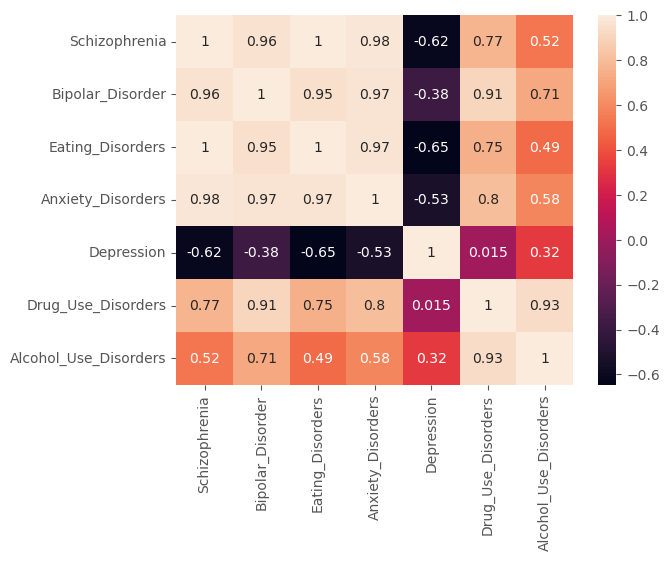

In [21]:
sns.heatmap(df_morocco_corr, annot=True)

In [ ]:
Visualize mean depression prevalence by entity


In [22]:
# df3['Entity'].unique()

In [23]:
# Select a few entities for analysis
selected_entities = ['Morocco', 'Mozambique', 'Myanmar']

# Filter the data for selected entities
df_selection = df3[df3['Entity'].isin(selected_entities)]

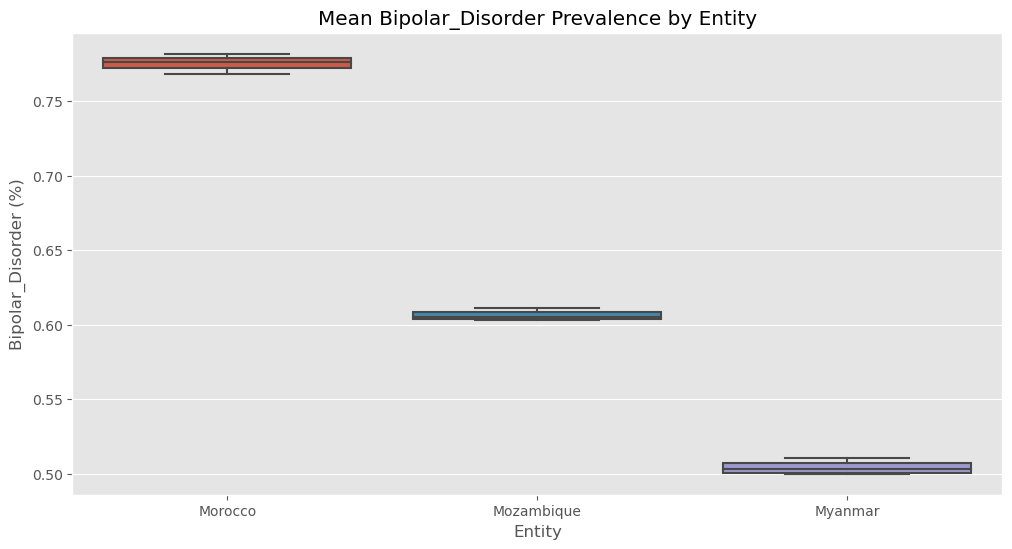

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Entity', y='Bipolar_Disorder', data=df_selection)
plt.title('Mean Bipolar_Disorder Prevalence by Entity')
plt.xlabel('Entity')
plt.ylabel('Bipolar_Disorder (%)')
plt.show()

### Requirement FR8 - Detect and remove any outliers in the data used for your "interesting" pattern or trend

In [ ]:
# replace with your code

### Requirement FR9 - Define a hypothesis to test your “interesting” pattern or trend

In [ ]:
Hypothesis

In [ ]:
- H0: There's no difference in the mean Bipolar_Disorder across selected entities
- H1: There's a difference in the mean Bipolar_Disorder across selected entities

### Requirement FR10 - Test your hypothesis with statistical significance level of 0.05

In [25]:
# Perform one-way ANOVA

f_statistic, p_value = f_oneway(df3[df3['Entity'] == 'Belarus']['Bipolar_Disorder'],
                                 df3[df3['Entity'] == 'Belgium']['Bipolar_Disorder'],
                                 df3[df3['Entity'] == 'Belize']['Bipolar_Disorder'])

print(f'ANOVA F-statistic: {f_statistic}')
print(f'ANOVA p-value: {p_value}')

significance_level = 0.05
if p_value < significance_level:
    print("The mean Bipolar_Disorder prevalence is significantly different among the entities.")
else:
    print("There is no significant difference in the mean Bipolar_Disorder prevalence among the entities.")

ANOVA F-statistic: 30403.612618334388
ANOVA p-value: 3.3116466217478524e-117
The mean Bipolar_Disorder prevalence is significantly different among the entities.
